In [1]:
import lstm1
import time
import matplotlib.pyplot as plt
import numpy as np

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

Using TensorFlow backend.


In [2]:
global_start_time = time.time()
epochs  = 1
seq_len = 50

print('> Loading data... ')

X_train, y_train, X_test, y_test = lstm1.load_data('sinwave.csv', seq_len, True)

print('> Data Loaded. Compiling...')

model = lstm1.build_model([1, 50, 100, 1])

model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=epochs,
    validation_split=0.05)

predicted = lstm1.predict_point_by_point(model, X_test)

> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03214287757873535
Train on 4232 samples, validate on 223 samples
Epoch 1/1
4232/4232 [==============================] - 15s - loss: 0.1838 - val_loss: 0.0353


In [3]:
#plot_results_multiple(predicted, y_test, 50) 

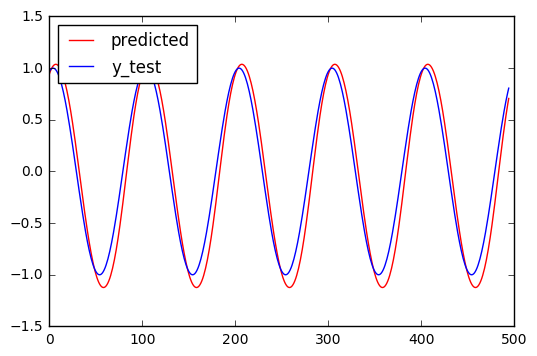

In [4]:
plt.plot(predicted,color='red', label='predicted')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()